In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12

In [19]:
ED = pd.read_csv('C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/health/ED/ED_data_multiplevisitsNOTremoved.csv')
subset = ED[["Patient_ID","allresp1","asthma1","COPD1","pneumonia1","bronchitis1","allcardio1","cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]]
summed = subset.groupby('Patient_ID').sum()

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_22500\2315696723.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ED = pd.read_csv('C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/health/ED/ED_data_multiplevisitsNOTremoved.csv')


In [3]:
(len(subset) - len(summed) )/len(subset)

0.3152466772734536

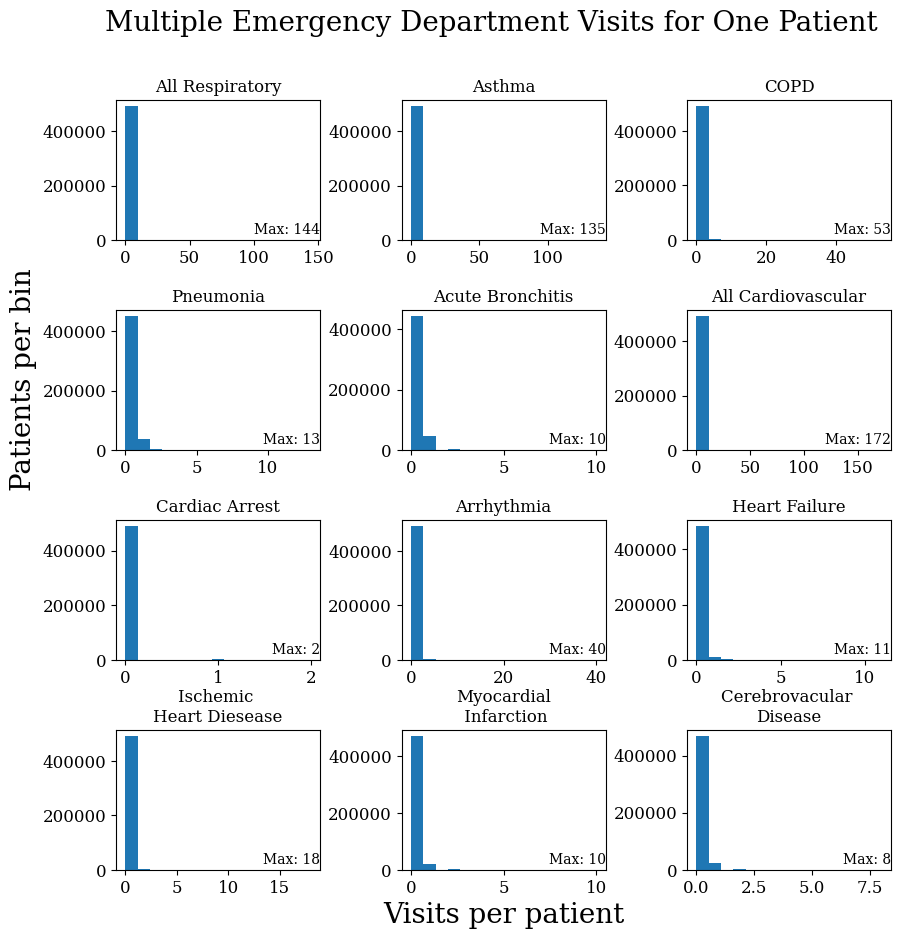

In [24]:
listy = ["allresp1", "asthma1","COPD1","pneumonia1","bronchitis1", "allcardio1", "cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]
list2 = ['All Respiratory', 'Asthma', 'COPD', 'Pneumonia', 'Acute Bronchitis','All Cardiovascular', 'Cardiac Arrest', 'Arrhythmia',
          'Heart Failure', 'Ischemic \nHeart Diesease', 'Myocardial\n Infarction', 'Cerebrovacular \nDisease']
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(10,10), gridspec_kw = {'wspace':.4, 'hspace':.5})
axs=axs.flatten()
plt.suptitle('Multiple Emergency Department Visits for One Patient', fontsize = 20, y = .97)
for i in range(0,12):
        axs[i].hist(summed[listy[i]], bins = 15)
        axs[i].set_title('Max: ' + str(np.max(summed[listy[i]])), loc='right', fontsize=10, y = -0.02);
        axs[i].set_title(list2[i], fontsize = 12)
        if (i == 3):
            axs[i].set_ylabel('Patients per bin', fontsize = 20)
        if (i == 10):
            axs[i].set_xlabel('Visits per patient', fontsize = 20)
fig.savefig('../Figures/MultipleEDvisits.png', dpi = 300, bbox_inches = 'tight')

In [35]:
essence = pd.read_csv('../Data/health/ESSENCE/ALLCLEANED_multiplevisitsNOTremoved.csv')
subset = essence[["Visit_ID",'BroadResp', 'AQResp', 'Asthma', 'Cardio']]
dup = subset[subset.duplicated(['Visit_ID'], keep=False)].sort_values('Visit_ID')
summed = dup.groupby('Visit_ID').sum()
len(dup)/2/len(essence)

0.20938277404682845

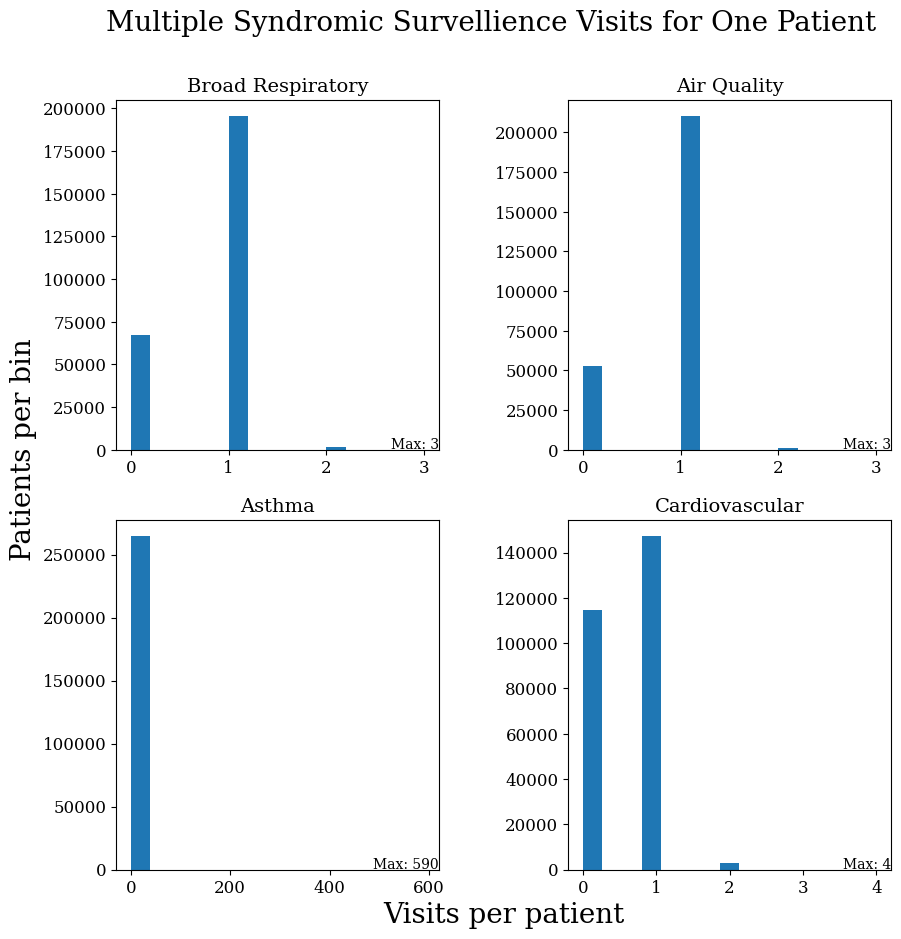

In [40]:
listy = ['BroadResp', 'AQResp', 'Asthma', 'Cardio']
list2 = ['Broad Respiratory', 'Air Quality', 'Asthma', 'Cardiovascular']
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10), gridspec_kw = {'wspace':.4, 'hspace':.2})
axs=axs.flatten()
plt.suptitle('Multiple Syndromic Survellience Visits for One Patient', fontsize = 20, y = .97)
for i in range(0,4):
        values, bins, bars = axs[i].hist(summed[listy[i]], bins = 15)
        axs[i].set_title('Max: ' + str(np.max(summed[listy[i]])), loc='right', fontsize=10, y = -0.02);
        axs[i].set_title(list2[i], fontsize = 14)
        if (i == 2):
            axs[i].set_ylabel('Patients per bin', fontsize = 20, y = 1.2)
        if (i == 2):
            axs[i].set_xlabel('Visits per patient', fontsize = 20, x = 1.2)
            fig.savefig('../Figures/MultipleESSENCEvisits.png', dpi = 300, bbox_inches = 'tight')